## Store Sales Forcast using Time Series Data

In [1]:
# importing the panada library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
!jt -r


Reset css and font defaults in:
C:\Users\USER\.jupyter\custom &
C:\Users\USER\AppData\Roaming\jupyter\nbextensions


### Data Preprocessing

In [2]:
# Loading the dataset or use glob to load the dataset

df1 = pd.read_csv("holidays_events.csv")
df2 = pd.read_csv("oil.csv")
df3 = pd.read_csv("stores.csv")
df4 = pd.read_csv("transactions.csv")
df5 = pd.read_csv("train.csv", index_col="date")
df6 = pd.read_csv("test.csv")

In [3]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
# combing the the dataset into one:

file = df5.merge(df1, on="date", how="left")
file = file.merge(df2, on = "date", how="left")
file = file.merge(df3, on = "store_nbr", how = "left")
file = file.merge(df4, on = ["date", "store_nbr"], how = "left")

In [14]:
# data info
file.index = pd.to_datetime(file.index)

file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type_x        object 
 6   locale        object 
 7   locale_name   object 
 8   description   object 
 9   transferred   object 
 10  dcoilwtico    float64
 11  city          object 
 12  state         object 
 13  type_y        object 
 14  cluster       int64  
 15  transactions  float64
dtypes: float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [8]:
# shape of the data

file.shape

(3054348, 17)

In [9]:
# setting the date as the id index 

file.set_index("date", inplace= True)

file.head()



,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
date,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [10]:
# checking for the value counts of the type_x column

file.type_x.value_counts()

type_x
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

111, 27

drop description, type_x, transferred

In [11]:
# checking through the unique values of the family column

file.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [12]:
# checking for the sumk fo

file.isnull().sum()

id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
city                  0
state                 0
type_y                0
cluster               0
transactions     249117
dtype: int64

### Data Exploration

In [30]:
file.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06,2.805231e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00,1.697071e+03
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00,9.668317e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00,1.046000e+03
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00,1.395000e+03
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01,2.081000e+03
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03


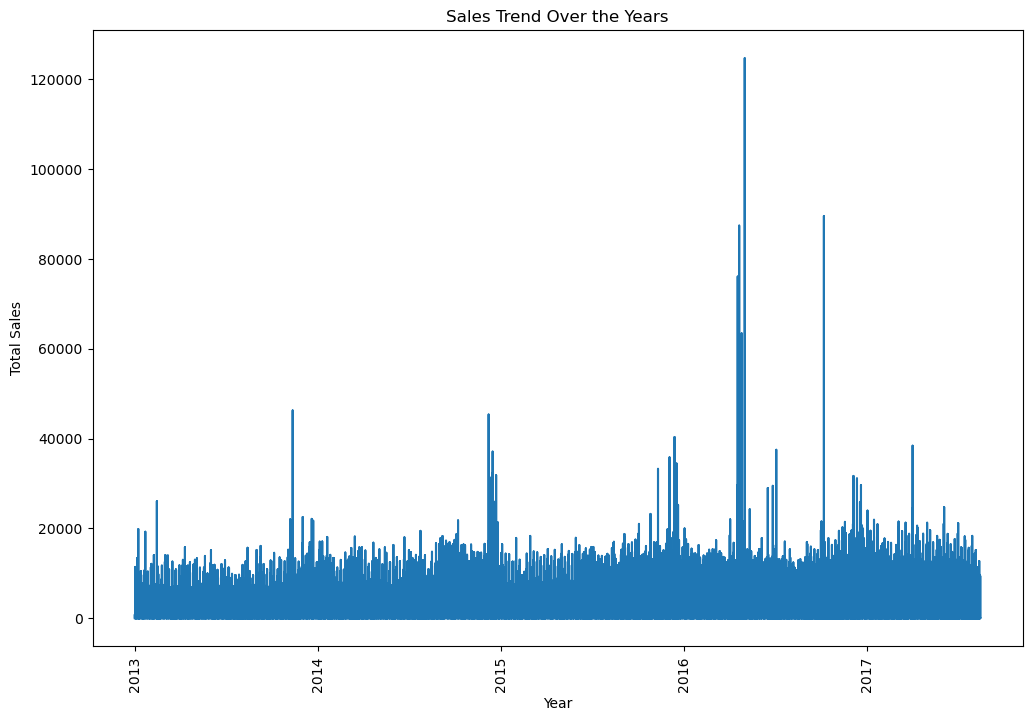

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(file["sales"])
plt.title('Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90);

The graph indicates a consistent spike in sales quantity towards the end of each year. Additionally, a substantial surge in goods quantity is observed between the first and last quarters of the year 2016 to 2017, marking the highest recorded store sales during that period.

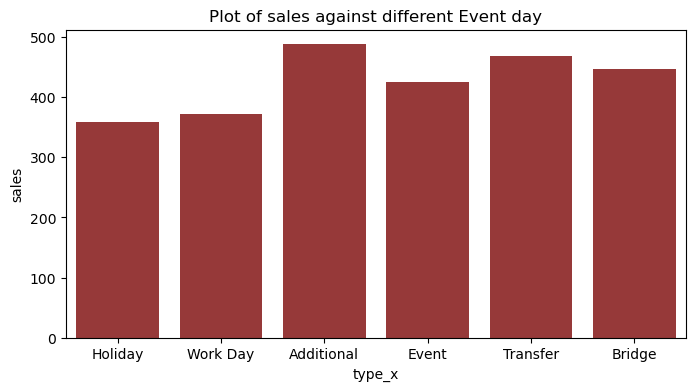

In [31]:
#Plot of sales against diffeernet category
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x = 'type_x' , y= 'sales' , data= file, errorbar=None, color = "brown");
plt.title("Plot of sales against different Event day");


The graph indicates that the inclusion of extra days during holidays has a greater impact on the quantity of goods sold across various stores, followed by days when the holiday was officially transferred, with the second-highest sales. This pattern aligns with the idea that if the transfer is to the following day, people may engage in shopping for the upcoming holiday. Additionally, the plot highlights that actual holiday days contribute the least, possibly because individuals prefer to relax at home and spend time with their families, especially during shorter holidays.

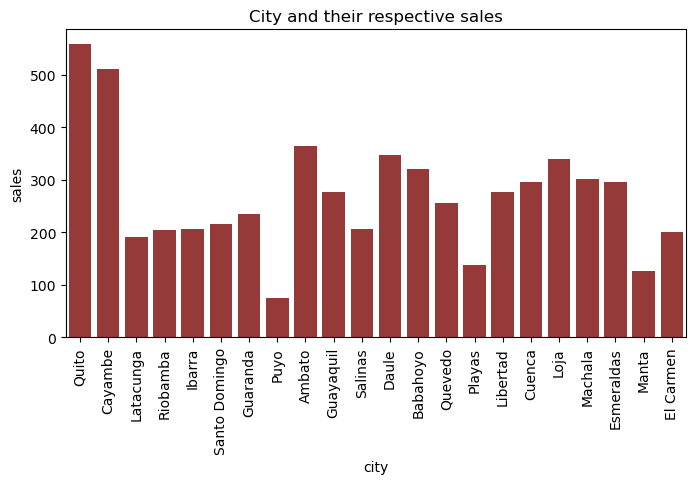

In [16]:
#Plot of sales from different cities

fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x = 'city' , y= 'sales' , data= file, errorbar=None, color = "brown");
plt.title("City and their respective sales");
plt.xticks(rotation=90);

The graph illustrates that the predominant share of sales originates from Quito city, with significant contributions from Cayambe, both surpassing 500 units sold. In contrast, other cities register sales below 300 units.



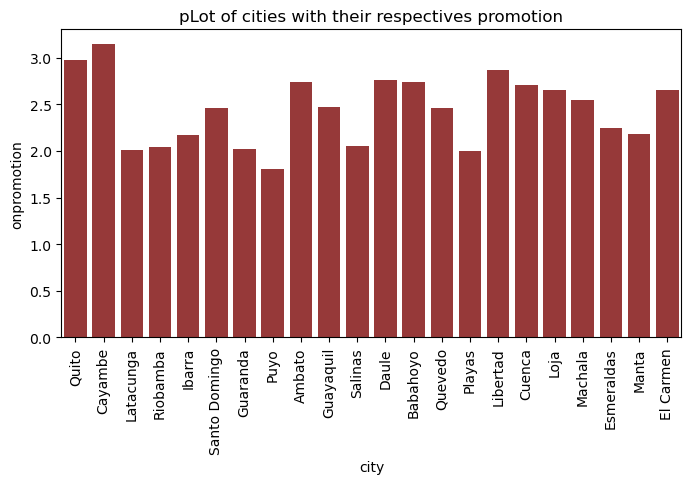

In [17]:
# pLot of cities with their respectives promotion
# order=file.groupby('city')['onpromotion'].mean().sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x ='city' , y='onpromotion' , data= file, errorbar=None, color = "brown");
plt.title("pLot of cities with their respectives promotion");
plt.xticks(rotation=90);

The graph indicates a higher occurrence of promotions in Cayambe and Quito city, likely contributing to the substantial sales in these areas. Nevertheless, the plot reveals a relatively spread of sales promotions across various cities.

Correlation: 0.428


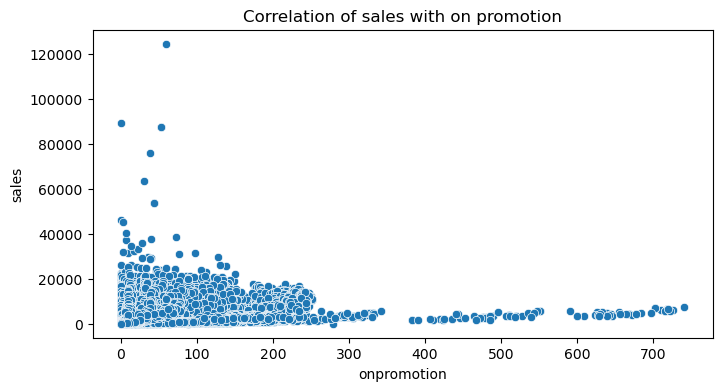

In [32]:
# Correlation of sales with on promotion
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x="onpromotion", y="sales", data = file);
plt.title("Correlation of sales with on promotion")

corr = file["onpromotion"].corr(file["sales"]);
print(f"Correlation: {corr:.3}");

When sales are low, the company tends to increase promotions to stimulate sales. However, when sales reach their peak, fewer promotions are implemented. The correlation between sales and promotion is not strong, as sales peak while promotion efforts decrease or become non-existent.

Correlation value: -0.07939344988982726


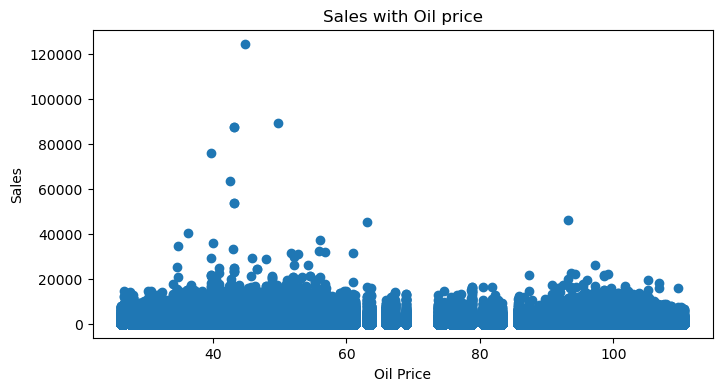

In [33]:
# plot of sales with Oil price
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(y= file["sales"], x=file["dcoilwtico"]);
plt.title("Sales with Oil price")
plt.xlabel("Oil Price")
plt.ylabel("Sales")

corr1 = file["sales"].corr(file["dcoilwtico"]);
print(f"Correlation value: {corr1}");

There is a negative correlation with a minimal impact. According to the plot, the influence on sales is more pronounced when the oil price ranges from 0 to 100, particularly at its lowest. However, as sales approach their peaks, the impact of oil prices diminishes.

In [16]:
# grouping based on product family and sorting in order

sort_sales = file.groupby("family").sum().sort_values(by="sales", ascending=False)
sort_sales_f_10 = sort_sales.head(10)
sort_sales_L_10 = sort_sales.tail(10)

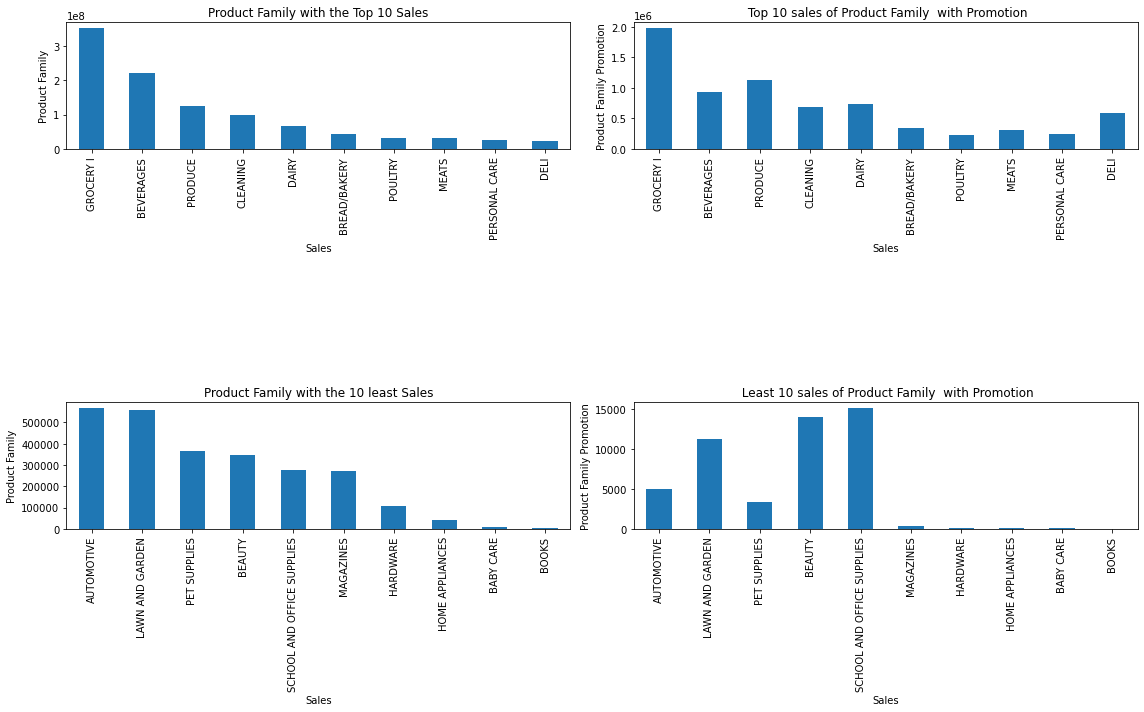

In [17]:
fig, ax= plt.subplots(figsize = (8,10))

plt.subplot(2,2,1)
sort_sales_f_10.sales.plot(kind="bar")
plt.xlabel("Sales")
plt.ylabel("Product Family")
plt.title("Product Family with the Top 10 Sales")

plt.subplot(2,2,2)
sort_sales_f_10.onpromotion.plot(kind="bar")
plt.xlabel("Sales")
plt.ylabel("Product Family Promotion")
plt.title(" Top 10 sales of Product Family  with Promotion")

plt.subplot(2,2,3)
sort_sales_L_10.sales.plot(kind="bar")
plt.xlabel("Sales")
plt.ylabel("Product Family")
plt.title("Product Family with the 10 least Sales")

plt.subplot(2,2,4)
sort_sales_L_10.onpromotion.plot(kind="bar")
plt.xlabel("Sales")
plt.ylabel("Product Family Promotion")
plt.title(" Least 10 sales of Product Family  with Promotion")


plt.tight_layout()
plt.subplots_adjust(hspace=2)

The chart displays the top 10 sales based on product families, with groceries making the most substantial contribution to the total sales, followed by beverages. Conversely, automotive and lawn and garden contribute the least to the overall sales.

Additionally, the plot reveals that product families with higher promotion levels contributed more significantly to the total revenue. Conversely, product families with minimal or no promotion made lesser contributions to the total sales, emphasizing that the majority of the revenue is derived from promoted products.

**Findings Summary:**

1. **Sales Distribution by Product Family:**
   - Groceries and beverages stand out as the top contributors to total sales.
   - Automotive and lawn and garden product families contribute the least to overall sales.

2. **Impact of Promotion on Revenue:**
   - Product families with higher promotion levels show a more significant contribution to total revenue.
   - Families with minimal or no promotion make lesser contributions, indicating the importance of promotional activities in driving sales.

3. **Oil Price Impact:**
   - The influence of oil prices on sales is more pronounced at lower price ranges (0 to 100), particularly when sales are at their lowest.
   - As sales reach their peaks, the impact of oil prices diminishes.

4. **Correlation Between Sales and Promotion:**
   - A negative correlation exists between sales and promotion, with sales peaking while promotion efforts decrease or become non-existent.



**Recommendations to Improve:**

1. **Optimize Promotion Strategies:**
   - Evaluate and refine promotion strategies for product families to ensure a balanced and effective approach.
   - Consider increasing promotions for product families with lower sales to stimulate growth.

2. **Diversify Product Offerings:**
   - Explore opportunities to diversify product offerings, especially within the automotive and lawn and garden categories, to potentially boost sales.

3. **Monitor Oil Price Sensitivity:**
   - Continuously monitor the sensitivity of sales to oil price fluctuations and adjust strategies accordingly.
   - Consider implementing targeted marketing efforts during periods of higher oil prices to mitigate potential negative effects.

4. **Sales Variation:**
   - Tailor promotional strategies to local preferences and market dynamics.

5. **Customer Engagement Programs:**
   - Implement customer engagement programs to enhance loyalty and encourage repeat purchases.
   - Leverage data on past sales and customer behavior to create personalized promotions.



In [38]:
# we need to plot heat, so as to know the variables that are high correlated and drop them
#corr = df5.select_dtypes(exclude="object").corr()
#sns.heatmap(corr)

df5.select_dtypes(exclude="object").corr().style.background_gradient(cmap="coolwarm")

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


### Training the Model

In [1]:
# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import time
import numpy as np

In [13]:
data = pd.read_csv("train.csv", index_col="date").drop(columns="id")
data.index = pd.to_datetime(data.index)
data.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   sales        float64
 3   onpromotion  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [14]:
dat = pd.get_dummies(data, columns=['family'], drop_first=True)
dat = dat.astype(int)


In [8]:
dat.head()

,store_nbr,sales,onpromotion,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 35 columns):
 #   Column                             Dtype
---  ------                             -----
 0   store_nbr                          int32
 1   sales                              int32
 2   onpromotion                        int32
 3   family_BABY CARE                   int32
 4   family_BEAUTY                      int32
 5   family_BEVERAGES                   int32
 6   family_BOOKS                       int32
 7   family_BREAD/BAKERY                int32
 8   family_CELEBRATION                 int32
 9   family_CLEANING                    int32
 10  family_DAIRY                       int32
 11  family_DELI                        int32
 12  family_EGGS                        int32
 13  family_FROZEN FOODS                int32
 14  family_GROCERY I                   int32
 15  family_GROCERY II                  int32
 16  family_HARDWARE                    int3

In [ ]:
# Plot of the ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(data["sales"], ax=ax)

plt.show

### Train the model for prediction

#### Train/Test Split

In [15]:
# for now, we will not be adding any new feature.
train = dat.loc["2013-01-01":"2013-05-30"]
cut="2016-12-31"

test = dat.loc[cut: "2017-06-15"]

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (267300, 35)
Test Shape: (297594, 35)


In [16]:
# train

target = "sales"
y_train = train[target]
x_train = train.drop(columns="sales")

In [19]:
x_train.shape

(267300, 34)

In [17]:
# Baseline mean absolute error
y_train_mean = train["sales"].mean()
y_pred_baseline = [y_train_mean] * len(train["sales"])
MAE_baseline = mean_absolute_error(train["sales"], y_pred_baseline)

print("Mean Sales:", round(y_train_mean, 2))
print("Baseline MAE:", round(MAE_baseline, 2))

Mean Sales: 200.75
Baseline MAE: 299.58


### Hyperparameter Tuning

In [54]:
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

In [55]:
np.asarray(x_train)

array([[1, 0, False, ..., False, False, False],
       [1, 0, True, ..., False, False, False],
       [1, 0, False, ..., False, False, False],
       ...,
       [9, 3, False, ..., True, False, False],
       [9, 0, False, ..., False, True, False],
       [9, 0, False, ..., False, False, True]], dtype=object)

In [66]:
SARIMAX(y_train, exog=x_train, order=order)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:

p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = SARIMAX(y_train, exog=x_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)


print(mae_grid)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 0) in 195.97 seconds.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 1) in 626.93 seconds.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 2) in 947.17 seconds.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
y_train.index.freq = 'D'

### TEST prediction

In [8]:
# TEST prediction
testi= pd.read_csv("test.csv")
testi.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
testi = pd.read_csv("test.csv", index_col="date").drop(columns="id")
testi.index = pd.to_datetime(testi.index)
testi.head()

,store_nbr,family,onpromotion
date,,,
2017-08-16,1,AUTOMOTIVE,0
2017-08-16,1,BABY CARE,0
2017-08-16,1,BEAUTY,2
2017-08-16,1,BEVERAGES,20
2017-08-16,1,BOOKS,0


In [21]:
dati = pd.get_dummies(testi, columns=['family'], drop_first=True)
dati = dat.astype(int)


In [25]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(testi)):
    model = SARIMAX(y_train, exog=x_train, order=(0,0,1)).fit()
    
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [ ]:
# split the data fro traning and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [38]:
# Iterate through the model

model = make_pipeline(
    OneHotEncoder(use_cat_names = True),0.
    
    SimpleImputer(),
    LinearRegression()
    
)

model.fit(x_train, y_train)

TypeError: 'tuple' object is not callable